# Optimizing Gym Equipment Utilization.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
gym_data = pd.read_csv('problem2.csv')

### Exploratory Data Analysis (EDA)

In [3]:
print("Dataset overview:")
print(gym_data.info())

Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB
None


In [4]:
gym_data.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


### Data Preprocessing

In [5]:
# Drop rows with any NaN values
gym_data = gym_data.dropna()

In [6]:
# Convert 'date' to datetime format with UTC timezone
gym_data['date'] = pd.to_datetime(gym_data['date'], utc=True)

### Correlation Matrix

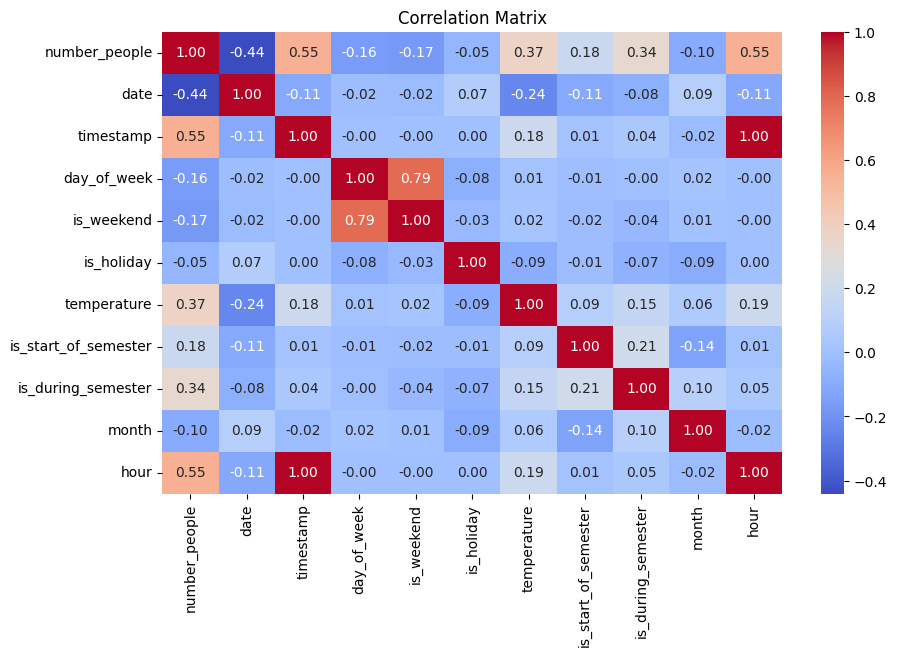

In [7]:
plt.figure(figsize=(10, 6))
corr_matrix = gym_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Data Splitting

In [8]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X_gym = gym_data.drop(columns=['date', 'number_people'])
y_gym = gym_data['number_people']

# Split the data into training and testing sets
X_train_gym, X_test_gym, y_train_gym, y_test_gym = train_test_split(X_gym, y_gym, test_size=0.3, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training set: {X_train_gym.shape}, {y_train_gym.shape}")
print(f"Testing set: {X_test_gym.shape}, {y_test_gym.shape}")

Training set: (43528, 9), (43528,)
Testing set: (18656, 9), (18656,)


### Model Development

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_regressor.fit(X_train_gym, y_train_gym)

# Make predictions on the test set
y_pred_gym = rf_regressor.predict(X_test_gym)

# Evaluate the model
rf_mse = mean_squared_error(y_test_gym, y_pred_gym)
print(f"Random Forest Regressor MSE: {rf_mse:.2f}")

Random Forest Regressor MSE: 120.05


### Model Evaluation and Visualization

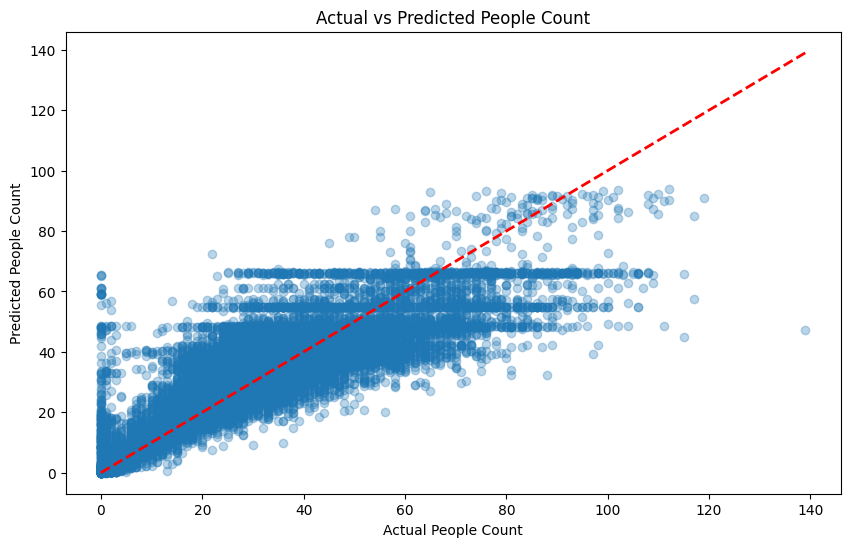

In [10]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_gym, y_pred_gym, alpha=0.3)
plt.plot([y_test_gym.min(), y_test_gym.max()], [y_test_gym.min(), y_test_gym.max()], 'r--', lw=2)
plt.title('Actual vs Predicted People Count')
plt.xlabel('Actual People Count')
plt.ylabel('Predicted People Count')
plt.show()

Linear Regression MSE: 250.37


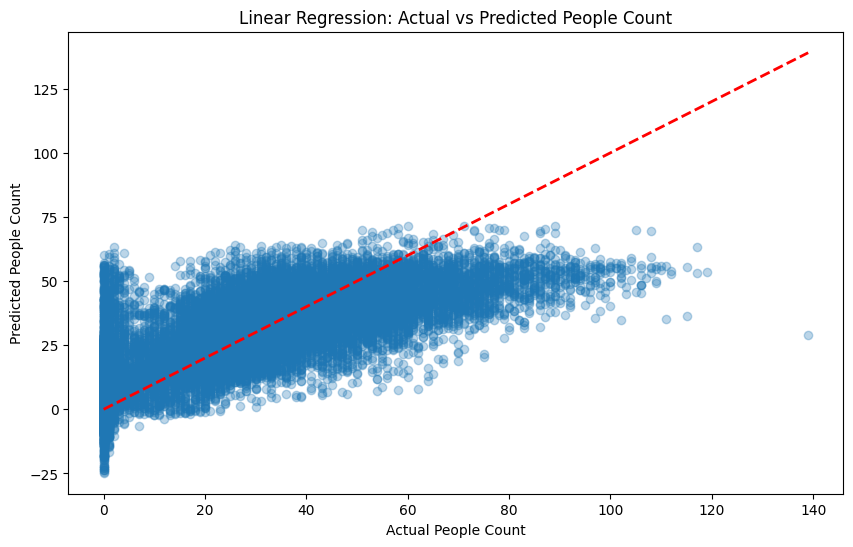

In [11]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train_gym, y_train_gym)

# Make predictions
y_pred_lin = lin_reg.predict(X_test_gym)

# Evaluate the model
lin_mse = mean_squared_error(y_test_gym, y_pred_lin)
print(f"Linear Regression MSE: {lin_mse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_gym, y_pred_lin, alpha=0.3)
plt.plot([y_test_gym.min(), y_test_gym.max()], [y_test_gym.min(), y_test_gym.max()], 'r--', lw=2)
plt.title('Linear Regression: Actual vs Predicted People Count')
plt.xlabel('Actual People Count')
plt.ylabel('Predicted People Count')
plt.show()


Gradient Boosting Regressor MSE: 113.39


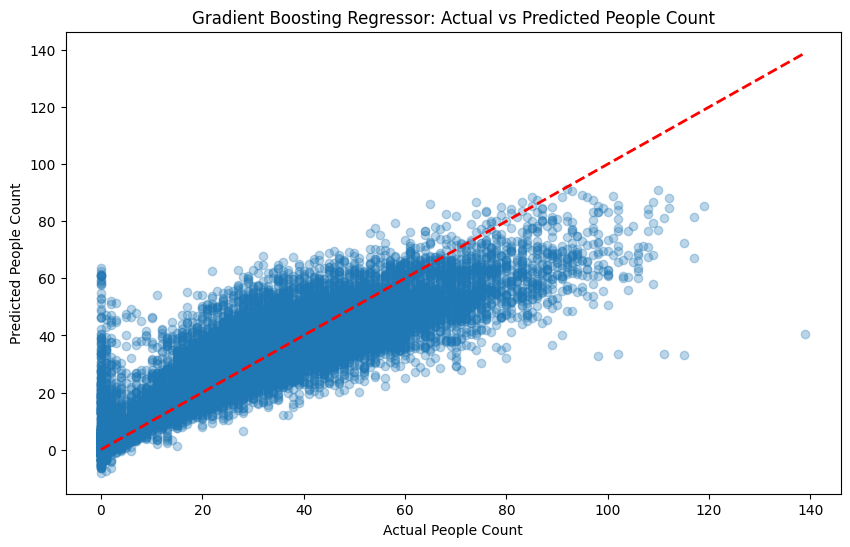

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
gb_regressor.fit(X_train_gym, y_train_gym)

# Make predictions
y_pred_gb = gb_regressor.predict(X_test_gym)

# Evaluate the model
gb_mse = mean_squared_error(y_test_gym, y_pred_gb)
print(f"Gradient Boosting Regressor MSE: {gb_mse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_gym, y_pred_gb, alpha=0.3)
plt.plot([y_test_gym.min(), y_test_gym.max()], [y_test_gym.min(), y_test_gym.max()], 'r--', lw=2)
plt.title('Gradient Boosting Regressor: Actual vs Predicted People Count')
plt.xlabel('Actual People Count')
plt.ylabel('Predicted People Count')
plt.show()


K-Nearest Neighbors Regressor MSE: 170.39


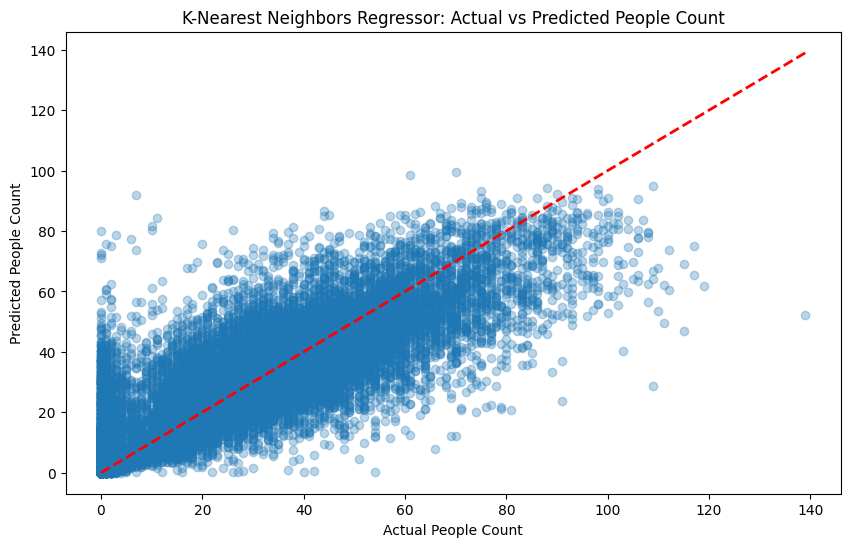

In [13]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize K-Nearest Neighbors Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train_gym, y_train_gym)

# Make predictions
y_pred_knn = knn_regressor.predict(X_test_gym)

# Evaluate the model
knn_mse = mean_squared_error(y_test_gym, y_pred_knn)
print(f"K-Nearest Neighbors Regressor MSE: {knn_mse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_gym, y_pred_knn, alpha=0.3)
plt.plot([y_test_gym.min(), y_test_gym.max()], [y_test_gym.min(), y_test_gym.max()], 'r--', lw=2)
plt.title('K-Nearest Neighbors Regressor: Actual vs Predicted People Count')
plt.xlabel('Actual People Count')
plt.ylabel('Predicted People Count')
plt.show()


In [15]:
# Print all MSE values for comparison
print(f"Random Forest Regressor MSE: {rf_mse:.2f}")
print(f"Linear Regression MSE: {lin_mse:.2f}")
print(f"Gradient Boosting Regressor MSE: {gb_mse:.2f}")

print(f"K-Nearest Neighbors Regressor MSE: {knn_mse:.2f}")


Random Forest Regressor MSE: 120.05
Linear Regression MSE: 250.37
Gradient Boosting Regressor MSE: 113.39
K-Nearest Neighbors Regressor MSE: 170.39
